In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from scipy import signal as sg
from scipy import integrate
from scipy.interpolate import interpn,interp1d,RegularGridInterpolator, Akima1DInterpolator

import time
from tqdm import notebook
import importlib

import torch
from torch.utils.data import TensorDataset, DataLoader

import tarfile

%matplotlib inline

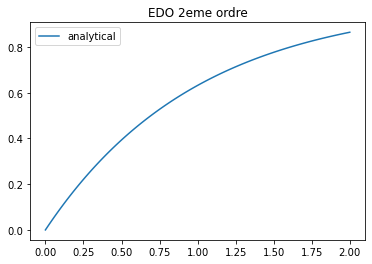

In [8]:
L = 1.0
D = 0.0
V = 1.0

def f(D, L, V, x):
    return (L-D)*(1-np.exp(-V*x)) + D

T = np.linspace(0,2, 100)
Y = f(D, L, V, T)
plt.plot(T,Y,label='analytical')
plt.title("EDO 2eme ordre")
plt.legend()

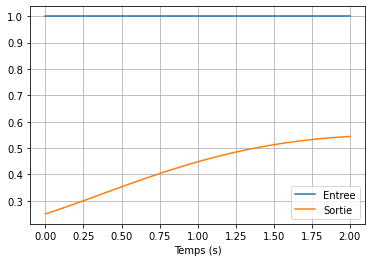

In [22]:
from scipy.optimize import minimize
import scipy.signal as sig
from scipy.optimize import least_squares

#b = [2,1]       # numerateur
#a = [1,0.5,1]     # denominateur

#H_1 = sig.lti(b,a)


entree = np.ones(len(T))

def pred(x, t_e):
    b1, b2, b3, a1, a2, a3 = x
    b = [b1, b2, b3]
    a = [a1, a2, a3]
    H_1 = sig.lti(b,a)
    [t_s, sortie, xout] = H_1.output(entree,t_e)
    return sortie

def err(x, t, y):
    return pred(x, t) - y


x = np.arange(1,7)
sortie = pred(x, T)
plt.plot(T, entree, label="Entree")
plt.plot(T, sortie,label="Sortie")
plt.grid()
plt.xlabel("Temps (s)")
plt.legend();

#res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})






In [29]:
res.x

array([5.02683941e-04, 8.54513452e+01, 3.54024347e-01, 8.54533129e+01,
       8.58023602e+01, 3.56635483e-01])

`gtol` termination condition is satisfied.
Function evaluations 23, initial cost 1.2405e+01, final cost 9.2759e-11, first-order optimality 6.33e-10.


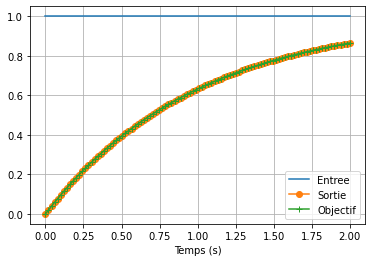

In [43]:
x0 = np.ones(6)

res = least_squares(err, x0, bounds=(0, 100), args=(T, Y), verbose=1)

x = res.x
sortie = pred(x, T)
plt.plot(T, entree, label="Entree")
plt.plot(T, sortie,label="Sortie", marker='o')
plt.plot(T, Y,label="Objectif", marker='+')
plt.grid()
plt.xlabel("Temps (s)")
plt.legend();

#res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})


